In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from sklearn import preprocessing
from sklearn.decomposition import PCA
import imblearn
from imblearn.over_sampling import SMOTE
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
data = pd.read_csv('/content/drive/MyDrive/data.csv')

In [5]:
data=data.drop(['nameOrig', 'nameDest'], axis = 1)

In [6]:
data=data.loc[(data['type']== 'TRANSFER') | (data['type']== 'CASH_OUT') , :]

In [7]:
data=pd.get_dummies(data, columns=['type'], prefix = ['type'])

In [8]:
# Features
X=data[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud','type_CASH_OUT','type_TRANSFER']]  

# Labels
y=data['isFraud'] 

# Split dataset into training set validation set and test set with a ratio of 70%,15%,15%

X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y , test_size=0.30, random_state=12)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, stratify=y_test , test_size=0.50, random_state=12)

In [9]:
o_sample=SMOTE('minority',random_state=12)
X_train_o, y_train_o = o_sample.fit_sample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


done forest with 20
done forest with 30
done forest with 40
done forest with 50
done forest with 60
done forest with 70
done forest with 80
done forest with 90
done forest with 100


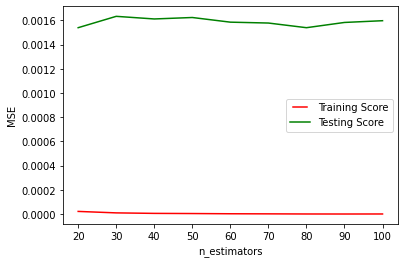

In [32]:
train_results = []
val_results =[]
test_results = []

train_recall=[]
val_recall=[]
test_recall=[]

train_precision=[]
val_precision=[]
test_precision=[]

train_f1score=[]
val_f1score=[]
test_f1score=[]


list_nb_trees = [20, 30,40,50,60,70,80,90,100]

for nb_trees in list_nb_trees:
    rf = RandomForestClassifier(n_estimators=nb_trees)
    rf.fit(X_train_o, y_train_o)

    train_results.append(mean_squared_error(y_train_o, rf.predict(X_train_o)))
    val_results.append(mean_squared_error(y_val, rf.predict(X_val)))
    test_results.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    train_recall.append(recall_score(y_train_o, rf.predict(X_train_o)))
    val_recall.append(recall_score(y_val, rf.predict(X_val)))
    test_recall.append(recall_score(y_test, rf.predict(X_test)))
    
    train_precision.append(precision_score(y_train_o, rf.predict(X_train_o)))
    val_precision.append(precision_score(y_val, rf.predict(X_val)))
    test_precision.append(precision_score(y_test, rf.predict(X_test)))
    
    train_f1score.append(f1_score(y_train_o, rf.predict(X_train_o)))
    val_f1score.append(f1_score(y_val, rf.predict(X_val)))
    test_f1score.append(f1_score(y_test, rf.predict(X_test)))
    
    print('done forest with',nb_trees)

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show()

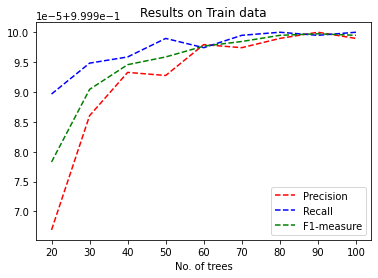

In [39]:
plt.title("Results on Train data")
plt.xlabel('No. of trees')
plt.plot(list_nb_trees, train_precision, linestyle = 'dashed', color = 'r', label = 'Precision')
plt.plot(list_nb_trees, train_recall, linestyle = 'dashed', color = 'b', label = 'Recall')
plt.plot(list_nb_trees, train_f1score, linestyle = 'dashed', color = 'g', label = 'F1-measure')
plt.legend()
plt.show()

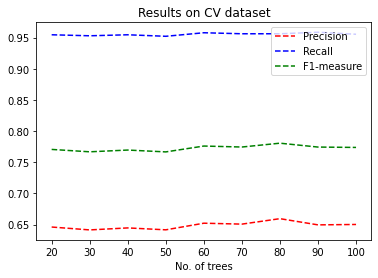

In [40]:
plt.title("Results on CV dataset")
plt.xlabel('No. of trees')
plt.plot(list_nb_trees, val_precision, linestyle = 'dashed', color = 'r', label = 'Precision')
plt.plot(list_nb_trees, val_recall, linestyle = 'dashed', color = 'b', label = 'Recall')
plt.plot(list_nb_trees, val_f1score, linestyle = 'dashed', color = 'g', label = 'F1-measure')
plt.legend()
plt.show()

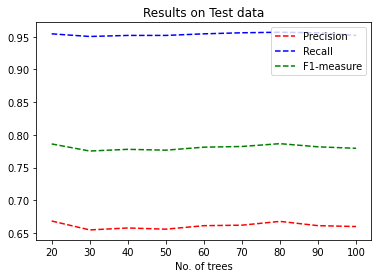

In [41]:
plt.title("Results on Test data")
plt.xlabel('No. of trees')
plt.plot(list_nb_trees, test_precision, linestyle = 'dashed', color = 'r', label = 'Precision')
plt.plot(list_nb_trees, test_recall, linestyle = 'dashed', color = 'b', label = 'Recall')
plt.plot(list_nb_trees, test_f1score, linestyle = 'dashed', color = 'g', label = 'F1-measure')
plt.legend()
plt.show()

In [10]:
def plottingConfusionMatAndRoc(y_test, y_pred,y_prob):

    markers = ('s', 'x')
    colors = ('red', 'blue')

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted class")
    plt.ylabel("Actual class")
    plt.figure(figsize=(5, 5))
    plt.show()
    #fig.tight_layout()

    # -----------------------------------------------------
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, lw = 2, label = 'AUC: {:.2f}'.format(auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1],
             linestyle = '--',
             color = (0.6, 0.6, 0.6),
             label = 'Random guessing')
    plt.plot([0, 0, 1], [0, 1, 1],
             linestyle = ':',
             color = 'black', 
             label = 'Perfect performance')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operator Characteristic (ROC) Curve')
    plt.legend(loc = "lower right")
    plt.figure(figsize=(5, 5))
    plt.show()
    #----------------------------------------

    print(classification_report(y_test, y_pred))

In [13]:
rf = RandomForestClassifier(n_estimators=80)
rf.fit(X_train_o, y_train_o)
y_pred=rf.predict(X_test)


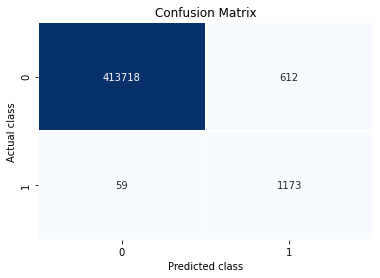

<Figure size 360x360 with 0 Axes>

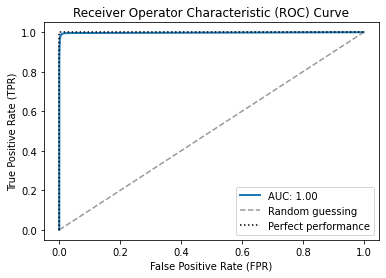

<Figure size 360x360 with 0 Axes>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    414330
           1       0.66      0.95      0.78      1232

    accuracy                           1.00    415562
   macro avg       0.83      0.98      0.89    415562
weighted avg       1.00      1.00      1.00    415562



In [12]:
y_prob = rf.predict_proba(X_test)[:, 1]
plottingConfusionMatAndRoc(y_test, y_pred,y_prob)